In [ ]:
# Rememoração: Manipulação de Strings

nome = 'Gustavo amaro'

# Métodos
nome.upper()
nome.casefold()
nome.capitalize()
nome.replace('u', 'x')
    # um terceiro valor pode ser adicionado, definindo a quantidade de ocorrência da troca, exemplo:
        # nome.replace('a', 'x', 2)
        # output: Gustxvo xmaro

cpf = '111223'
cpf.isnumeric()  # output: False
cpf.isalpha()    # output: True

nome.find('a')  # output: 4 -- index da primeira ocorrência

nome[2]     # output: s
nome[2:]    # output: tavo amaro
nome[::2]   # output: GsaoAao

palavras = nome.split()
# output: ['Gustavo', 'amaro']


# -----------------------------
lista = ['a\n', 'b\n', 'c\n']
lista = [i[:-1] for i in lista]
# output: ['a', 'b', 'c']

# É possível usar o split, se o texto for uma string, colocando como atributo de separação '\n'

In [1]:
import pandas as pd

df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt, df.sentiment, random_state=42)

In [3]:
classificacao = df['sentiment'].replace(['neg', 'pos'], [0,1])
df['classificacao'] = classificacao

from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)

dicionario = vetorizar.get_feature_names_out()

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)

In [4]:
from sklearn.linear_model import LogisticRegression

def classificar_txt(texto, coluna_txt, coluna_classe):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_txt])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classe], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

In [5]:
from wordcloud import WordCloud

todas_palavras = " ".join([texto for texto in df.text_pt])

import matplotlib.pyplot as plt
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('classificacao == 1')
    todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('classificacao == 0')
    todas_palavras = " ".join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [6]:
import nltk
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                            'Frequencia': list(frequencia.values())})

In [7]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

In [14]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()

for opiniao in df.text_pt:
    frase = list()
    palavras_opiniao = token_espaco.tokenize(opiniao)
    for palavra in palavras_opiniao:
        if palavra not in palavras_irrelevantes:
            frase.append(palavra)
    frase_processada.append(' '.join(frase))

df['tratamento_1'] = frase_processada
df

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...


In [9]:
frase = 'Olá, mundo!'
token_pontuacao = tokenize.WordPunctTokenizer()
    # separa as palavras pelas pontuações, assim, não temos o problema de as mesmas palavras serem classificadas como palavras diferentes
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Olá', ',', 'mundo', '!']

In [18]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

# tratamento para tirar as pontuações do texto, guardando o output na coluna "tratamento_2"
frase_processada = list()
for opiniao in df['tratamento_1']:
    nova_frase = list()
    token_frase = token_pontuacao.tokenize(opiniao)
    for palavra in token_frase:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

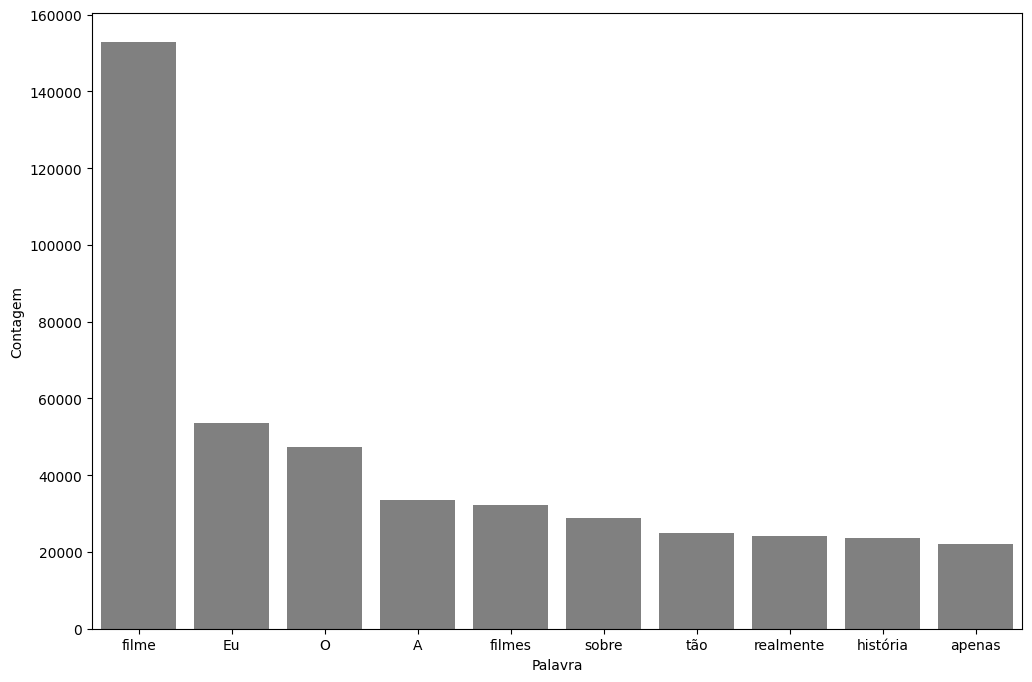

In [21]:
pareto(df, 'tratamento_2', 10)

In [25]:
# !pip install unidecode
import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)
    # elimina a acentuação das palavras
print(teste)

otimo pessimo nao e tao


In [30]:
sem_acentos = [unidecode.unidecode(texto) for texto in df["tratamento_2"]]

stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
df['tratamento_3'] = sem_acentos

# retira os acentos das palavras
frase_processada = list()
for opiniao in df['tratamento_3']:
    nova_frase = list()
    token_frase = token_pontuacao.tokenize(opiniao)
    for palavra in token_frase:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [42]:
df[['tratamento_1', 'tratamento_2', 'tratamento_3']].iloc[0]

tratamento_1    Mais vez, Sr. Costner arrumou filme tempo nece...
tratamento_2    Mais vez Sr Costner arrumou filme tempo necess...
tratamento_3    Mais vez Sr Costner arrumou filme tempo necess...
Name: 0, dtype: object

In [44]:
acuracia_trat3 = classificar_txt(df, "tratamento_3", 'classificacao')
acuracia_trat3

0.6887990295188031

score tratamento 0: 65.83%
score tratamento 1: 68.11% -> eliminação das stopwords
score tratamento 3: 68.87% -> eliminação das pontuações e acentos

In [49]:
frase_processada = []
for opiniao in df['tratamento_3']:
    nova_frase = []
    opiniao = opiniao.casefold()
    token_frase = token_pontuacao.tokenize(opiniao)
    for palavra in df['tratamento_3']:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

df['tratamento_4'] = frase_processada

In [ ]:
df